<a href="https://colab.research.google.com/github/Tomo0002/Stock_Product/blob/main/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

東灘の気温と人流の関係
「購買・売上予測への応用」
データ：気象庁・G空間情報センター

出典：「全国の人流オープンデータ」(国土交通省)(https://www.geospatial.jp/ckan/dataset/mlit-1km-fromto)を加工して作成

出典：気象庁 (過去の気象データ・ダウンロード) (https://www.data.jma.go.jp/gmd/risk/obsdl/#)基に加工して作成

兵庫県東灘の人流と天候との関係

In [7]:
pip install pytorch_lightning

     |████████████████████████████████| 527 kB 6.4 MB/s 
     |████████████████████████████████| 952 kB 47.1 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
     |████████████████████████████████| 829 kB 57.1 MB/s 
     |████████████████████████████████| 134 kB 56.5 MB/s 
     |████████████████████████████████| 398 kB 60.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.6 MB/s 
     |████████████████████████████████| 144 kB 65.5 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 271 kB 52.4 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=91ba33c97852c9c2098dc031c069f45ad46aa5ce4301d55c5358944477104cb7
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successful

In [65]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from pandas.io.parsers.readers import read_csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/東灘_150件.csv")
df_1 = read_csv("/content/drive/MyDrive/Colab Notebooks/東灘_150件_ヘッダーなし.csv", header=None)

In [49]:
data = np.array(df_1)

In [51]:
def rerl(x):
  return np.maximum(0, x)

In [76]:
def sigmoid_der(x):
  return (1 - sigmoid(x)) * sigmoid(x)

In [77]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [104]:
x = np.array(df_1); x
y = np.array(0.5)

lr = 0.03

In [105]:
np.ndim(x)

2

In [97]:
x.shape

(149, 6)

In [106]:
from numpy import random
A = random.randn(149, 149)

In [107]:
h = np.dot(A, x)

In [108]:
y_hat = sigmoid(h)

In [109]:
error = y - y_hat
error_team = error * sigmoid_der(h)

In [110]:
del_w = lr * error_team * x

In [ ]:
print('Output: ', h)

In [ ]:
print("Error:", error)

In [ ]:
print("delta_w:", del_w)

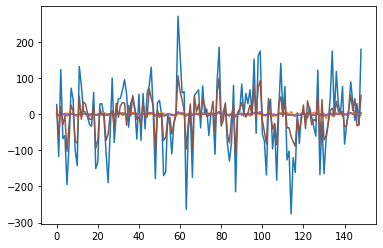

In [117]:
plt.plot(h)